In [6]:
# Import lilbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [8]:
# Import the data
df = pd.read_excel('Project_HR.xlsx')

In [11]:
# Explore the size of the data set
df.shape

(8553, 10)

In [12]:
# Explore the types of data and feature names
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.72,0.87,5,223,5,0,1,0,sales,low
2,0.37,0.52,2,159,3,0,1,0,sales,low
3,0.41,0.50,2,153,3,0,1,0,sales,low
4,0.10,0.77,6,247,4,0,1,0,sales,low
5,0.92,0.85,5,259,5,0,1,0,sales,low
6,0.89,1.00,5,224,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [14]:
# check for missings values or NAN
print(df.isnull().sum())
 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [16]:
# Exploring the types od data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     8553 non-null   float64
 1   last_evaluation        8553 non-null   float64
 2   number_project         8553 non-null   int64  
 3   average_montly_hours   8553 non-null   int64  
 4   time_spend_company     8553 non-null   int64  
 5   Work_accident          8553 non-null   int64  
 6   left                   8553 non-null   int64  
 7   promotion_last_5years  8553 non-null   int64  
 8   sales                  8553 non-null   object 
 9   salary                 8553 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 668.3+ KB


In [17]:
# Exploring the descriptive statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,8553.000000,8553.000000,8553.000000,8553.000000,8553.000000,8553.000000,8553.000000,8553.000000
mean,0.606063,0.715182,3.795160,200.833275,3.475038,0.144043,0.263533,0.016135
std,0.251083,0.171268,1.255722,50.391556,1.423892,0.351154,0.440575,0.126001
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.430000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [24]:
# Explore further
print('Number of salary classified as low or medium:', len(df[df.salary == 'low']))
print('Number of salary classified as low or medium:', len(df[df.salary == 'high']))

Number of salary classified as low or medium: 7316
Number of salary classified as low or medium: 1237


In [23]:
# Checking for category data for salary
df['salary'].unique()

array(['low', 'high'], dtype=object)

In [36]:
# split data into feature (X) and response(y)
# Given that the response is categorical, this is a classifiaction problem
X = df.iloc[:,0:5]
y = df.loc[:,['salary']]

In [37]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.72,0.87,5,223,5
2,0.37,0.52,2,159,3
3,0.41,0.50,2,153,3
4,0.10,0.77,6,247,4


y.sample(15,random_state=0)

In [48]:
# Split the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
print(X_train.shape,X_test.shape)
, 
# Fit data to tree-based classification model
classifier = DecisionTreeClassifier(random_state= 0)
classifier.fit(X_train,y_train)

#view accuracy prior to pruning
y_pred = classifier.predict(X_test)
test_score = accuracy_score(y_test,y_pred)

#print the test score
print('Accuracy of the tree: = {:2.2%}'.format(test_score))
                                                           

(6414, 5) (2139, 5)
Accuracy of the tree: = 81.02%


Since we havn't specified how large the training set and test set must be, by default is that one quarter is used for testing and three quarter for training dataset.
A model fiited without constraints has an accuracy score of 81.02%.The model os likely overfitted on the data, with terminal nodes having as little as one sample.

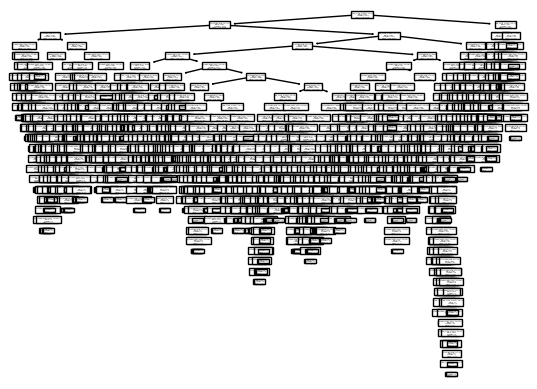

In [49]:
# Plot of full tree
plt.figure()
plot_tree(classifier,feature_names=X.columns)
plt.show()

In [45]:
print('Tree depth = ',classifier.get_depth(),'\n'
     'Number of leaves = ',classifier.get_n_leaves())

Tree depth =  35 
Number of leaves =  1186


To prevent the model from overfitting, then number of samples in each terminal node of leaf can be restricted.
We going to use a cross validation score to detect overfitted and prune the tree to reduce the sample size of the data sets

In [60]:
# Finding the optimal number of samples per leaf
samples = [sample for sample in range(1,50)]

classifiers = []
for sample in samples:
    classifier2 = DecisionTreeClassifier(random_state = 0,min_samples_leaf=sample)
    classifier2.fit(X_train,y_train)
    classifiers.append(classifier2)

In [61]:
# In order to find the optimal minimum leaf samples,cross validation is applied
validation_score = []
for sample in samples:
    classifier3 = DecisionTreeClassifier(random_state = 1,min_samples_leaf= sample)
    score = cross_val_score(estimator = classifier3,X=X_train,y=y_train,cv=5)
    validation_score.append(score.mean())

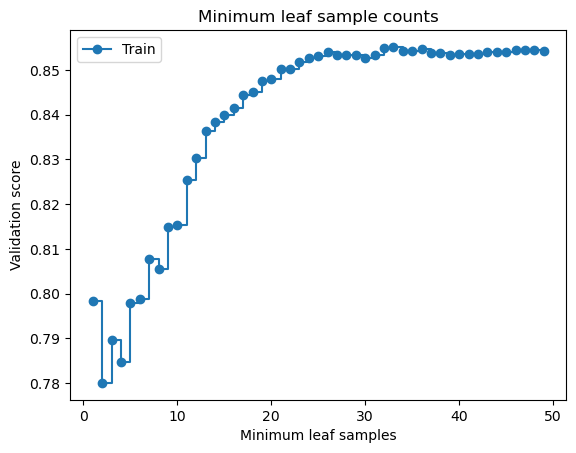

In [62]:
# Visualise the validation score in relation to minimum sample leaf
plt.figure()
plt.xlabel('Minimum leaf samples')
plt.ylabel('Validation score')
plt.title('Minimum leaf sample counts')
plt.plot(samples,validation_score,marker='o',label='Train',drawstyle = 'steps-post')
plt.legend()
plt.show()

In [63]:
# Obtain the minimum leaf samples  with the highest score
optimal_score = samples[validation_score.index(max(validation_score))]
print(optimal_score)

33


A minimun samples of 33 in terminal nodes has the best performance on the test data

In [64]:
# Use the optimal minimum leaf sample to fit the decision tree
classifier4 = DecisionTreeClassifier(random_state = 0,min_samples_leaf = optimal_score)
classifier4.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=33, random_state=0)

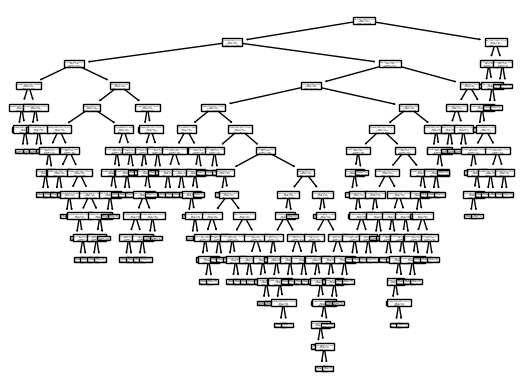

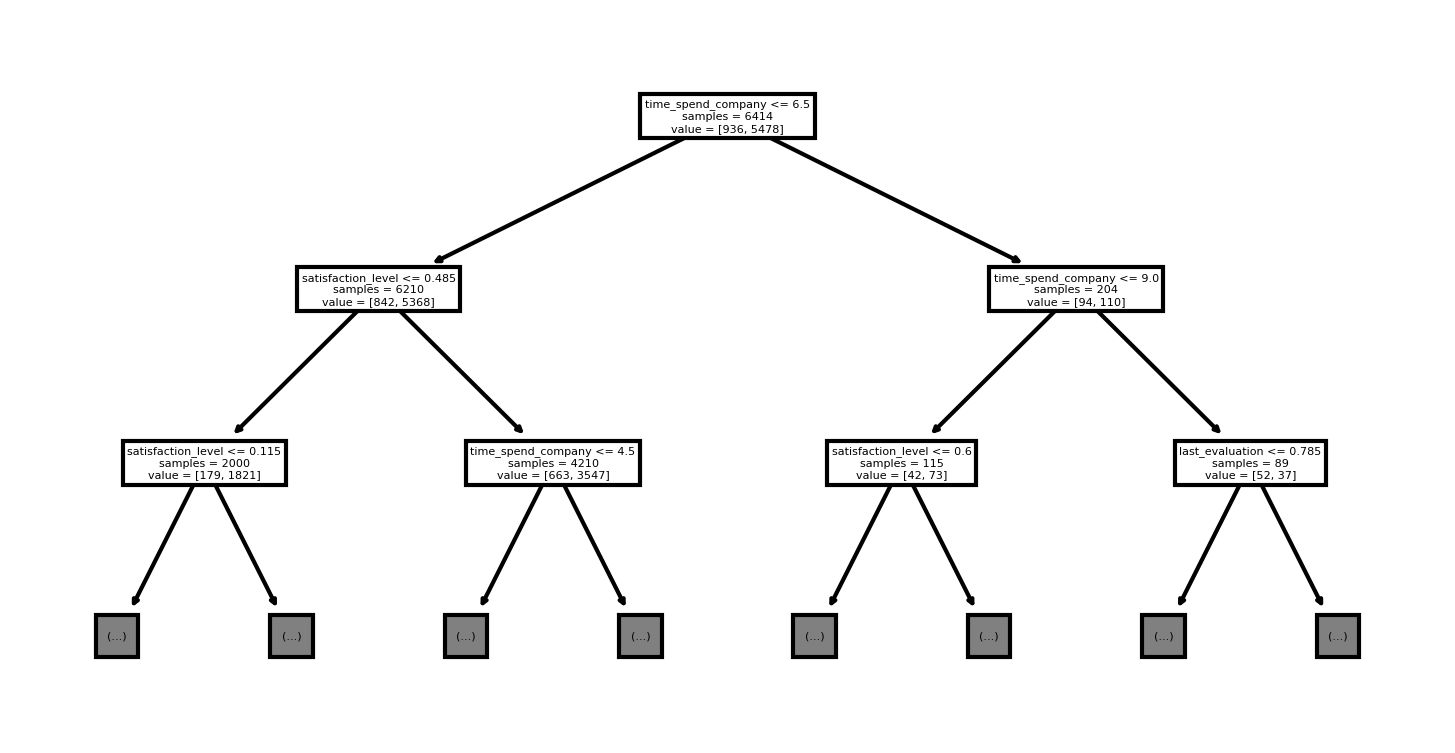

In [65]:
# Visualise the smaller pruned tree
plt.figure()
plot_tree(classifier4,feature_names=X_train.columns)
plt.show()

# Show the first few levels of the tree
plt.figure(figsize=[6,3], dpi = 300)
plot_tree(classifier4, max_depth=2,feature_names=X_train.columns, impurity = False)
plt.show()

As you can see in the previous tree image,the tree is far less complex tha the fully overfitted tree

In [66]:
# final test is to see g how the model performs
y_pred = classifier4.predict(X_test)
test_score2 = accuracy_score(y_test,y_pred)
print('Accuracy score of the optimal tree = {:2.2%}'.format(test_score2))

Accuracy score of the optimal tree = 86.07%


The test accuracy score is 86.07%. This is a 5% increase in performance over the previous score of 81.02, in this scenario any impovements in score is signifcant